In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import string
import re
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
df = pd.read_csv('input/Transaction_Naration_Data_Set.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df['AC_ID'] = pd.Categorical(df['AC_ID'])

In [3]:
df.describe(include='all')

,AC_ID,AMOUNT,DOC_DATE,NARATION,DR_CR
count,22546758.00,22546758.00,22546758,22545735,22546758
unique,2887759.00,NaN,180,128603,2
top,1863495.00,NaN,28-DEC-22,Cash Withdrawal From A/C No.:,Debit
freq,44975.00,NaN,740727,2359719,13871120
mean,NaN,20755.28,NaN,NaN,NaN
std,NaN,82347.50,NaN,NaN,NaN
min,NaN,0.01,NaN,NaN,NaN
25%,NaN,600.00,NaN,NaN,NaN
50%,NaN,1500.00,NaN,NaN,NaN
75%,NaN,7000.00,NaN,NaN,NaN


In [4]:
df.head()

,AC_ID,AMOUNT,DOC_DATE,NARATION,DR_CR
0,3644877,342800.00,01-NOV-22,Cash Withdraw,Debit
1,1175256,342800.00,01-NOV-22,Cash Withdrawal From A/C No.:,Credit
2,2298226,1500.00,01-NOV-22,"Cash withdraw from Micro Merchant point, MM A/C",Debit
3,4066427,1500.00,01-NOV-22,Credit Against Merchant Cash Withdraw Service ...,Credit
4,1978564,2550.00,01-NOV-22,"Cash withdraw from Micro Merchant point, MM A/C",Debit


In [5]:
df.dtypes

AC_ID       category
AMOUNT       float64
DOC_DATE      object
NARATION      object
DR_CR         object
dtype: object

In [6]:
narration = df['NARATION']
# remove punctuation
translator = str.maketrans('', '', string.punctuation)
narration = narration.apply(lambda x: str(x).translate(translator))
# narration.drop_duplicates().to_csv('input/narration_light_cleaned.csv', index=False)

In [7]:
# remove non-ascii characters
narration = narration.apply(lambda x: re.sub('[^\x00-\x7F]+', ' ', str(x).strip()))
narration.drop_duplicates().to_csv('input/narration_non_ascii_removed.csv', index=False)

In [8]:
unique_narration = df['NARATION']
unique_narration = unique_narration.drop_duplicates()
print(len(unique_narration))
# unique_narration.to_csv('input/narration.csv', index=False)

128604


In [9]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize 
import re
stop_words = stopwords.words('english')
wnl = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shuaib\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Shuaib\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shuaib\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
def clean_narration(x):
    x = str(x).lower().strip()
    x = re.sub('[^a-zA-Z ]', ' ', x)
    x = " ".join(x.split())
    words = word_tokenize(x)
    words = [wnl.lemmatize(w) for w in words]
    filtered_words = [w for w in words if w not in stop_words]
    return " ".join(filtered_words)

In [11]:
unique_narration = unique_narration.apply(lambda x: clean_narration(x))

In [12]:
unique_narration.to_csv('input/narration_cleaned.csv', index=False)

In [13]:
# vectorize the cleaned narration
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(unique_narration)
print(X.shape)

(128604, 30372)


In [14]:
num_clusters = 12
from sklearn.cluster import KMeans
km = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=100, n_init=1, verbose=True)
km.fit(X)

Initialization complete
Iteration 0, inertia 223305.37275635122.
Iteration 1, inertia 115537.7989615162.
Iteration 2, inertia 114966.24127240984.
Iteration 3, inertia 114656.5834275608.
Iteration 4, inertia 114560.39694702056.
Iteration 5, inertia 114537.96427513548.
Iteration 6, inertia 114531.8666834801.
Iteration 7, inertia 114529.61830264899.
Iteration 8, inertia 114529.02010506406.
Iteration 9, inertia 114528.60929047965.
Iteration 10, inertia 114528.58205620782.
Iteration 11, inertia 114528.56949521386.
Iteration 12, inertia 114528.56733701046.
Iteration 13, inertia 114528.5668975893.
Iteration 14, inertia 114528.56668036351.
Converged at iteration 14: strict convergence.


KMeans(max_iter=100, n_clusters=12, n_init=1, verbose=True)

In [15]:
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()


In [16]:
for i in range(num_clusters):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])

Cluster 0:
 sme
 jamtoil
 dal
 pu
 male
 purush
 kornushuti
 sav
 loan
 deposit
Cluster 1:
 transfer
 fund
 smart
 app
 regular
 cap
 dp
 payment
 transaction
 purpose
Cluster 2:
 udc
 itna
 deposit
 cash
 inter
 elongjuri
 withdraw
 agent
 branch
 mia
Cluster 3:
 nid
 doc
 withdraw
 bearer
 type
 md
 mob
 deposit
 inter
 cash
Cluster 4:
 islami
 eftn
 transaction
 bank
 ltd
 bangladesh
 bangldesh
 krishi
 arafah
 first
Cluster 5:
 withdraw
 md
 bazar
 dol
 mohila
 transfer
 fund
 islam
 polli
 roll
Cluster 6:
 salary
 month
 credit
 march
 january
 fvg
 november
 title
 february
 december
Cluster 7:
 cheque
 ae
 withdrawal
 ad
 banking
 branch
 agent
 cash
 ac
 md
Cluster 8:
 loan
 rlp
 phase
 rd
 disbursement
 interest
 saving
 fund
 purpose
 installment
Cluster 9:
 eftn
 transaction
 ltd
 bank
 sonali
 agrani
 janata
 bazar
 pubali
 rupali
Cluster 10:
 inter
 cash
 deposit
 branch
 agent
 withdraw
 md
 banking
 islam
 fund
Cluster 11:
 deposit
 cash
 withdraw
 md
 vgd
 self
 hossain

Cluster 0:


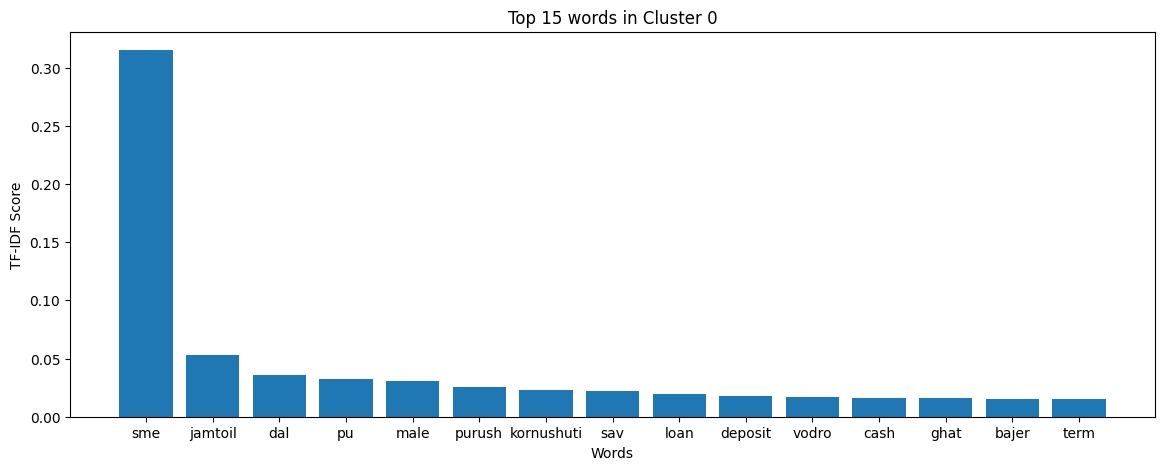

Cluster 1:


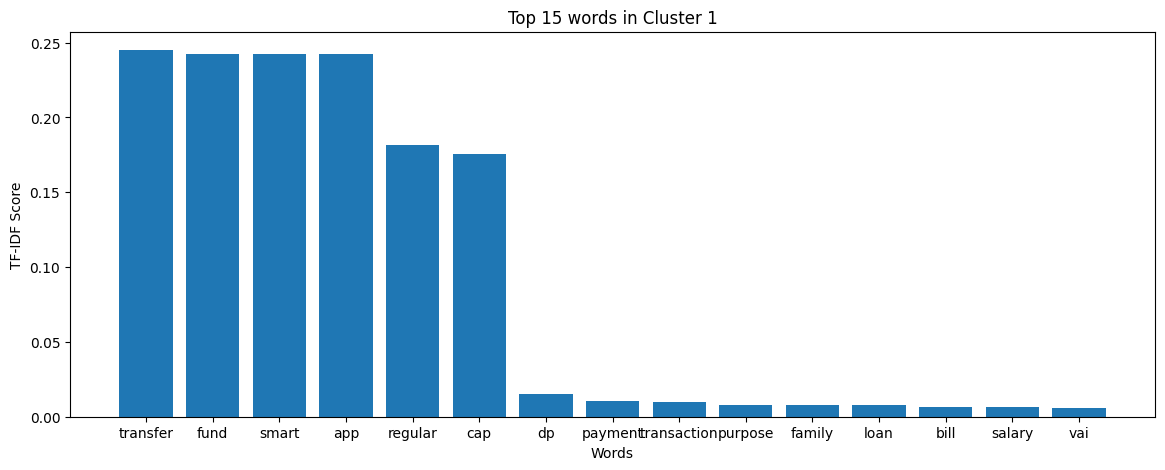

Cluster 2:


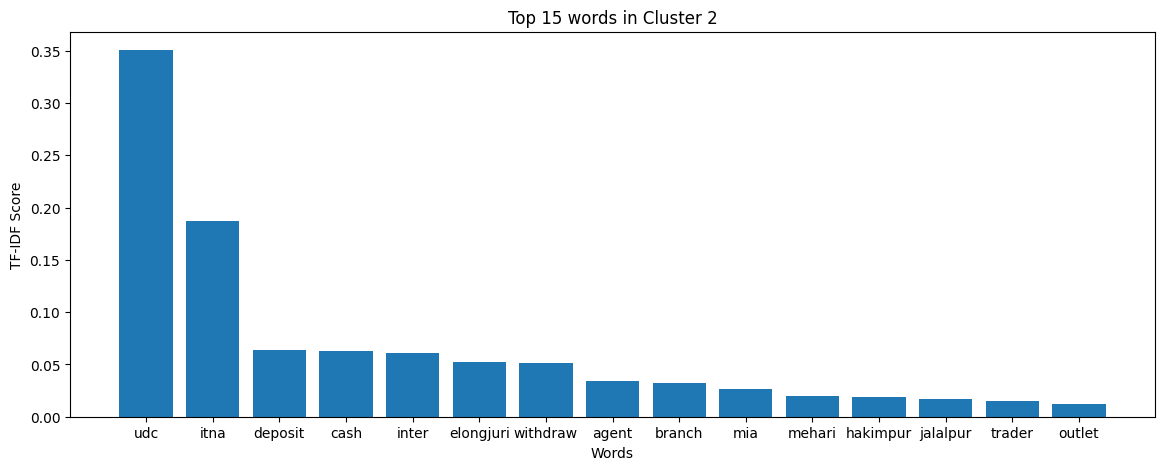

Cluster 3:


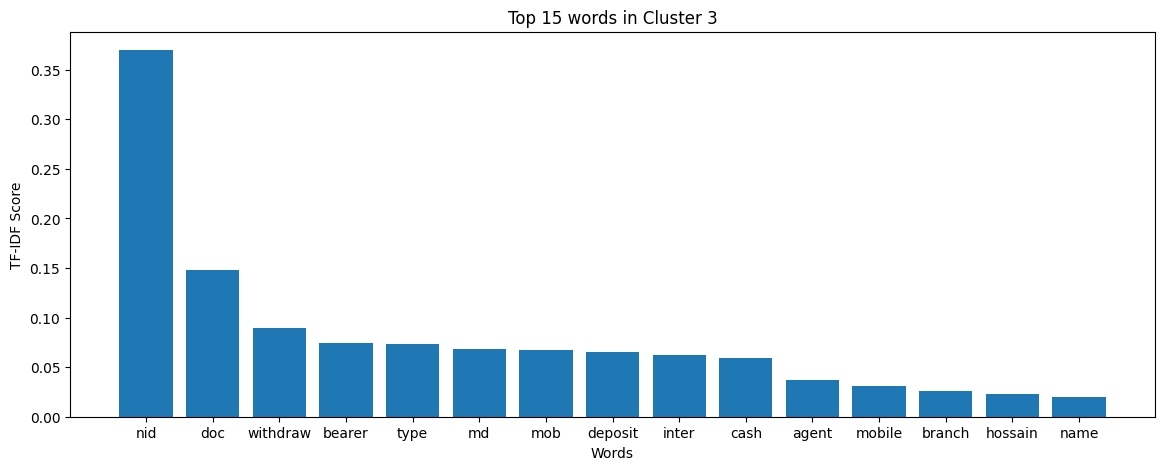

Cluster 4:


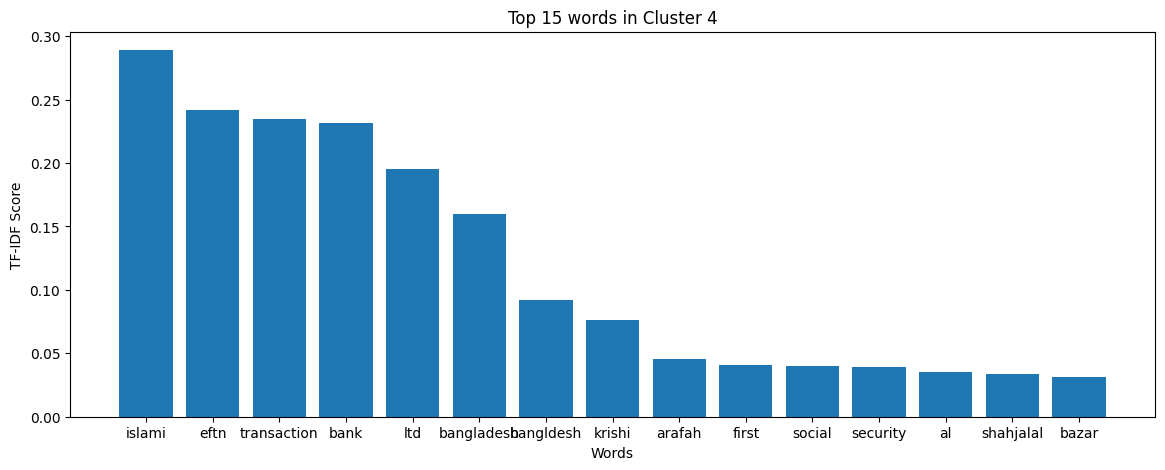

Cluster 5:


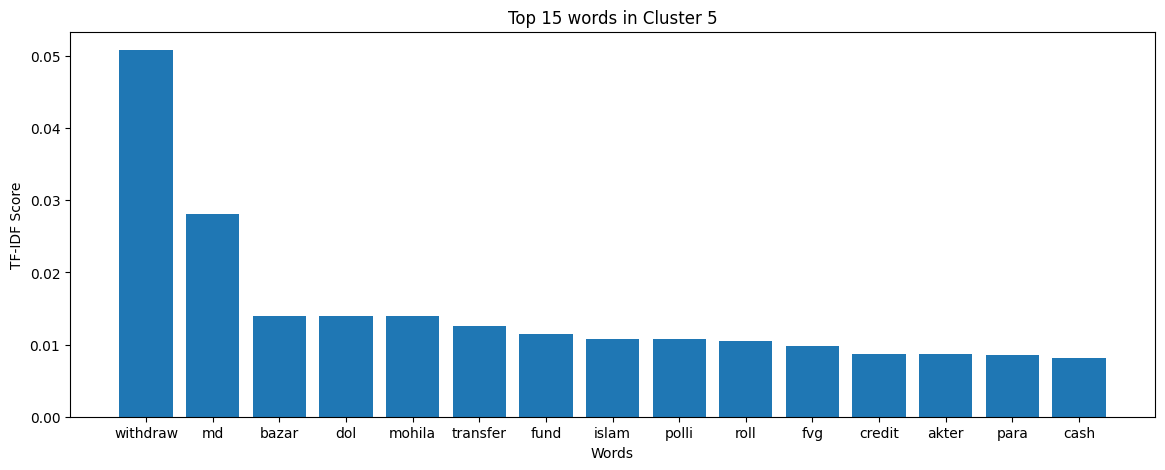

Cluster 6:


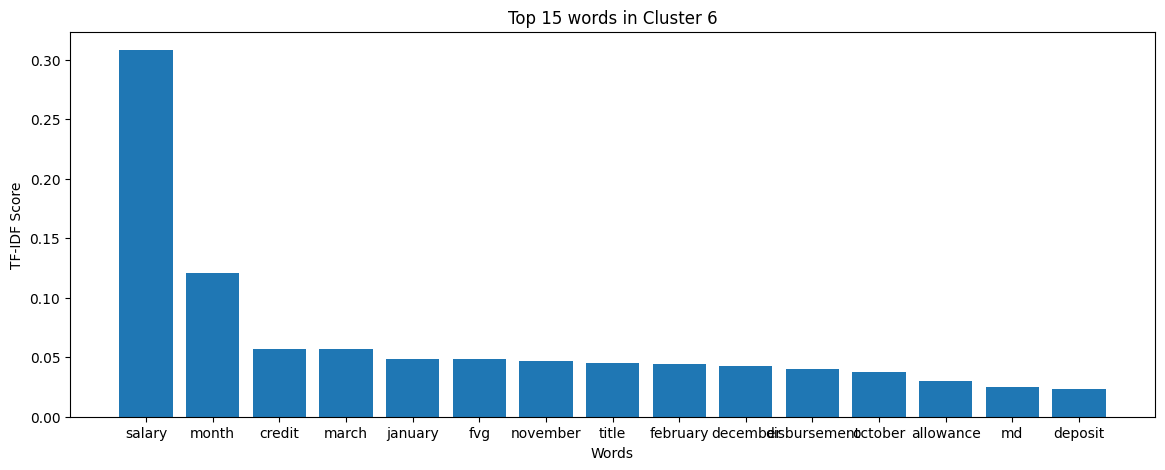

Cluster 7:


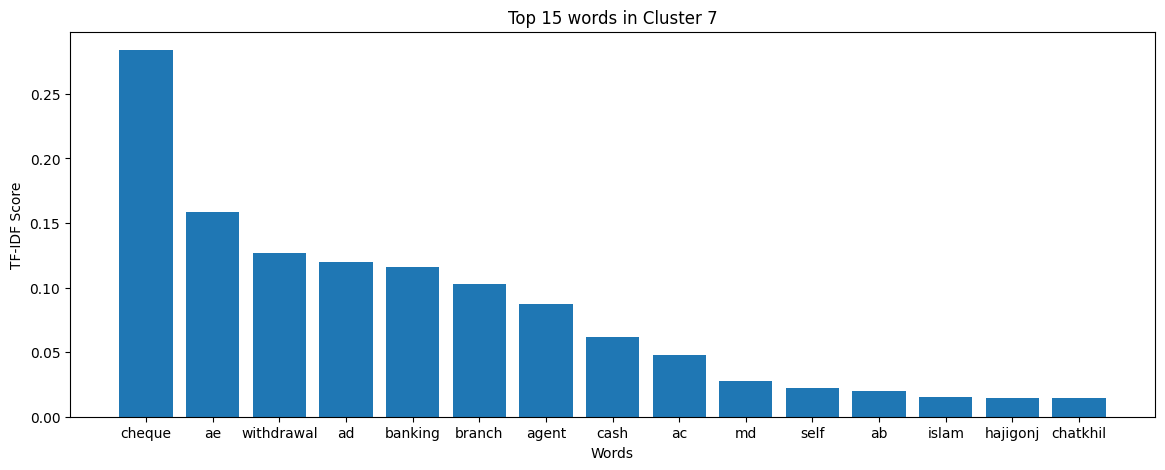

Cluster 8:


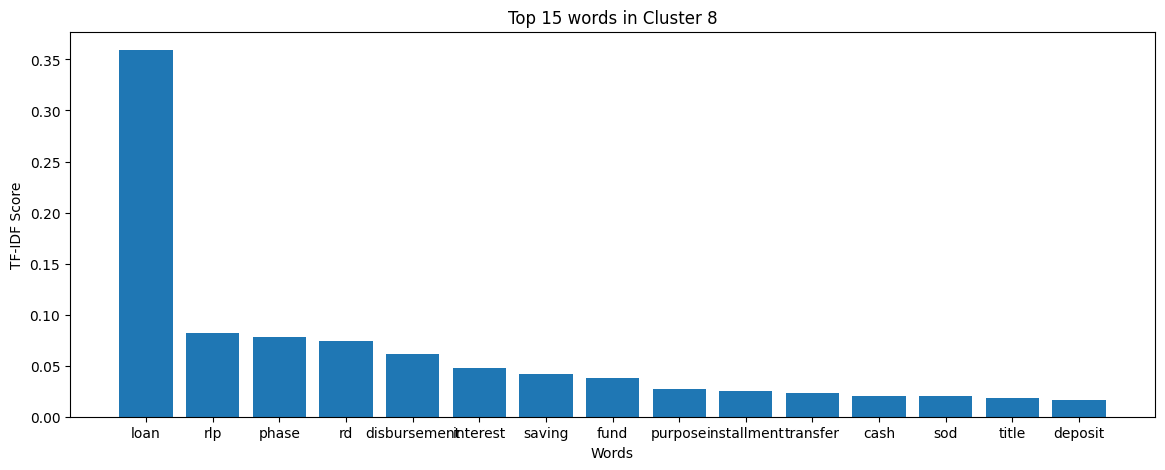

Cluster 9:


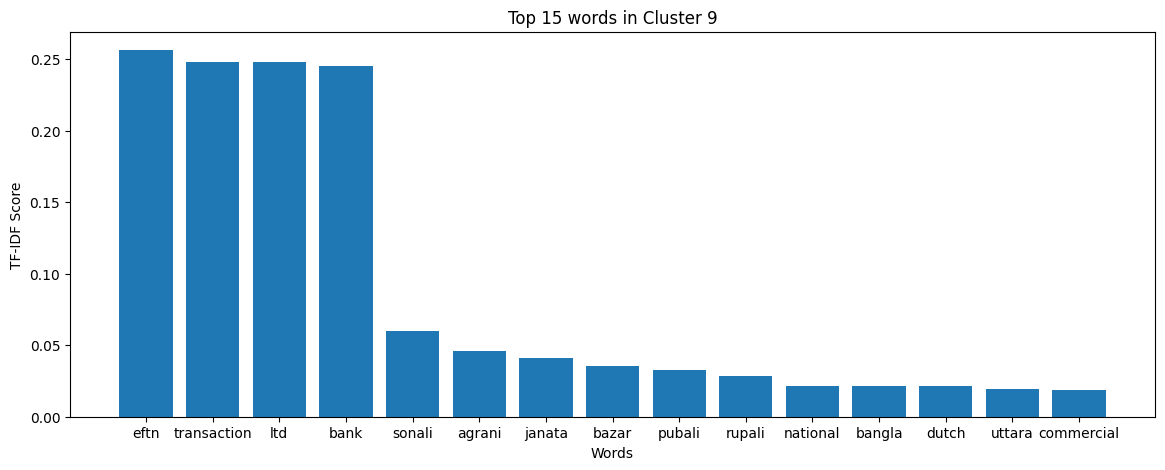

Cluster 10:


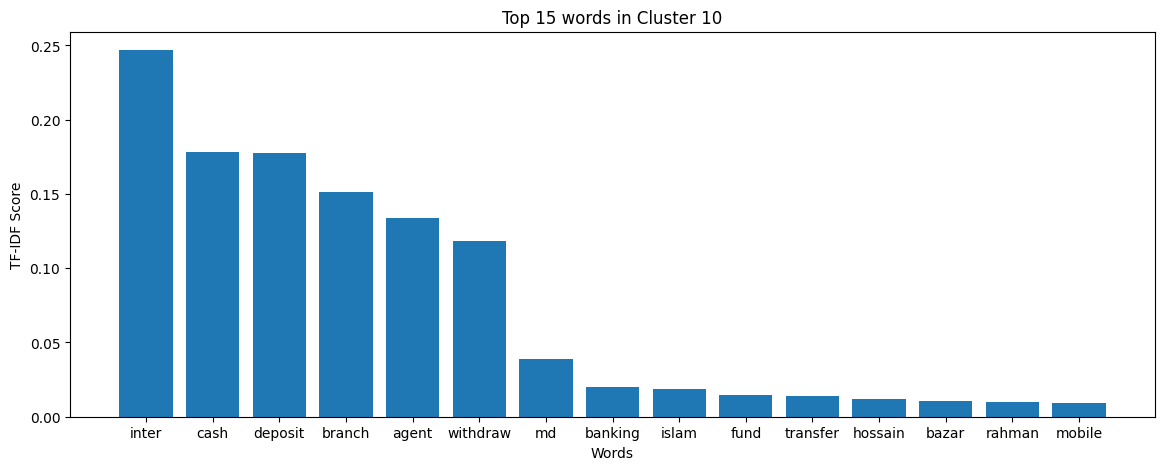

Cluster 11:


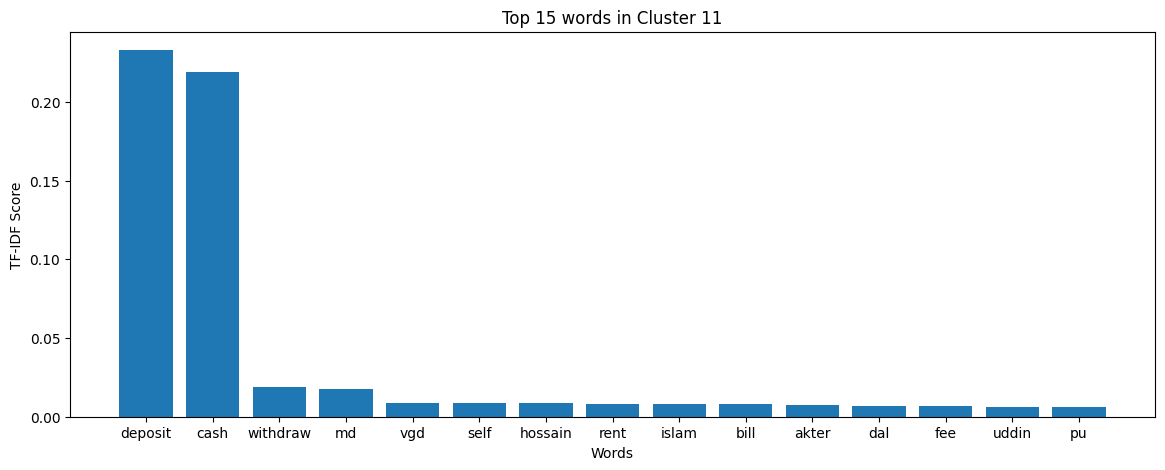

In [22]:
# now plot the histogram of top 10 words in each cluster

for i in range(num_clusters):
    print("Cluster %d:" % i)
    plt.figure(figsize=(14, 5))
    plt.bar(terms[order_centroids[i, :15]], km.cluster_centers_[i, order_centroids[i, :15]], align='center')
    plt.xlabel('Words')
    plt.ylabel('TF-IDF Score')
    plt.title('Top 15 words in Cluster %d' % i)
    plt.savefig('figures/cluster_%d.png' % i)
    plt.show()